# TATA IPL-2022 Auction analysis

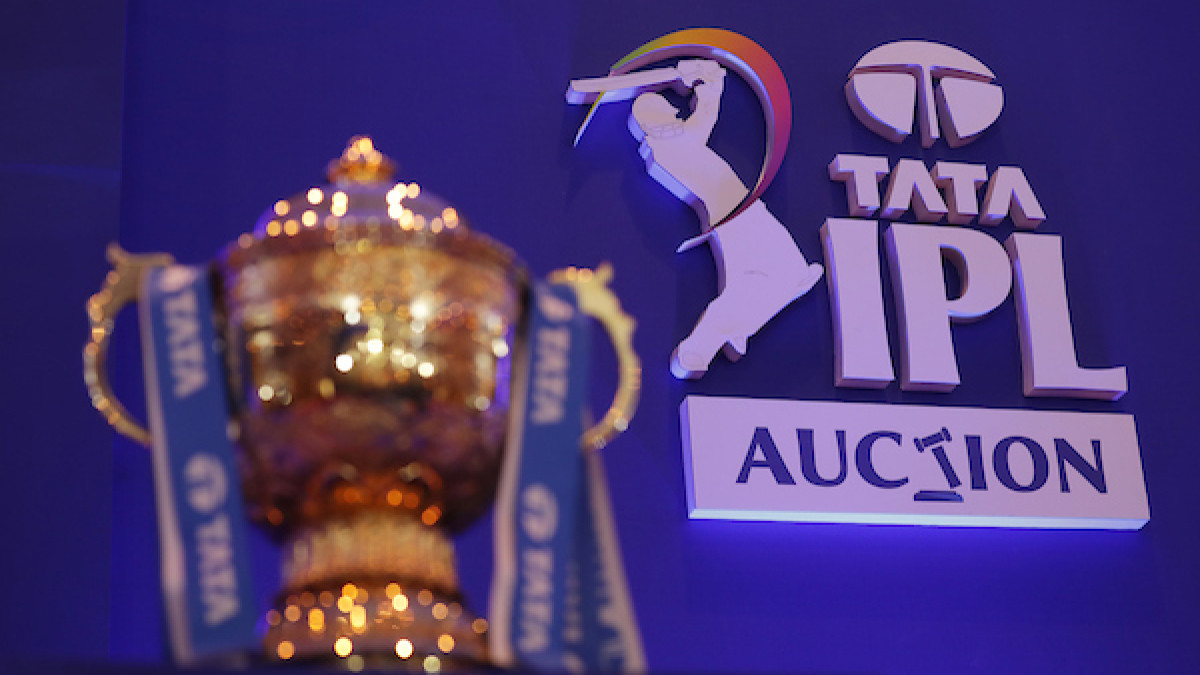

In [1]:
#IMPORTING LIBRERIES
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the data
data = pd.read_csv("IPL_Auction_2022_FullList.csv")

In [3]:
data.sample(5)

,Set No.,Set Name,Player,Country,State Association,Age,Specialism,Batting,Bowling,IPL,Previous IPLTeam(s),2021 Team,C/U/A,Base Price,Sold Price,New Franchise,Bid
548,59,UAL12,Shafiqullah Ghafari,Afghanistan,NaN,20,ALL-ROUNDER,RHB,RIGHT ARM Leg Spin,NaN,NaN,NaN,Uncapped,20,NaN,NaN,UnSold
314,31,FA4,Naveen Ul Haq,Afghanistan,NaN,22,BOWLER,RHB,RIGHT ARM Fast Medium,NaN,NaN,NaN,Capped,50,NaN,NaN,UnSold
567,61,UAL14,Sahil Dhiwan,India,RCA,24,ALL-ROUNDER,RHB,RIGHT ARM Fast Medium,NaN,NaN,NaN,Uncapped,20,NaN,NaN,UnSold
325,33,UAL4,Saurabh Kumar,India,UPCA,28,ALL-ROUNDER,LHB,LEFT ARM Slow Orthodox,0.0,"RPS, PBKS",NaN,Uncapped,20,NaN,NaN,UnSold
441,46,FA6,Joel Paris,Australia,NaN,29,BOWLER,LHB,LEFT ARM Fast Medium,NaN,NaN,NaN,Capped,50,NaN,NaN,UnSold


In [4]:
data.shape

(589, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Set No.              589 non-null    int64  
 1   Set Name             589 non-null    object 
 2   Player               589 non-null    object 
 3   Country              589 non-null    object 
 4   State Association    369 non-null    object 
 5   Age                  589 non-null    int64  
 6   Specialism           589 non-null    object 
 7   Batting              589 non-null    object 
 8   Bowling              589 non-null    object 
 9   IPL                  270 non-null    float64
 10  Previous IPLTeam(s)  265 non-null    object 
 11  2021 Team            165 non-null    object 
 12  C/U/A                589 non-null    object 
 13  Base Price           589 non-null    int64  
 14  Sold Price           204 non-null    object 
 15  New Franchise        204 non-null    obj

In [6]:
# column names are not as per python naming converstion 

In [7]:
data.columns = data.columns.str.replace(" ","_")

In [8]:
data.columns = data.columns.str.replace(".","")

### Set analysis 

In [9]:
data["Set_No"].describe()

count    589.000000
mean      32.096774
std       17.890516
min        1.000000
25%       17.000000
50%       32.000000
75%       48.000000
max       62.000000
Name: Set_No, dtype: float64

In [10]:
new_data = data.groupby("Set_No").size()

In [11]:
new_data

Set_No
1     10
2      8
3     10
4      8
5     10
      ..
58    10
59    10
60    10
61    12
62    12
Length: 62, dtype: int64

In [12]:
new_data.describe()

count    62.000000
mean      9.500000
std       1.127161
min       7.000000
25%       8.250000
50%      10.000000
75%      10.000000
max      12.000000
dtype: float64

In [13]:
print("there were in total {} sets ".format(new_data.count()))
print("Max no. of players in set is {} ".format(new_data.max()))
print("Min no. of  players in set is {}".format(new_data.min()))
print("Avg. no. of players in set is {} ".format(int(new_data.mean())))

there were in total 62 sets 
Max no. of players in set is 12 
Min no. of  players in set is 7
Avg. no. of players in set is 9 


In [14]:
data['State_Association'].isna().sum()

220

In [15]:
data["State_Association"] = data["State_Association"].fillna("Foreign_Player")

In [16]:
data['IPL'] = data['IPL'].fillna(0)

In [17]:
data['Previous_IPLTeam(s)'] = data['Previous_IPLTeam(s)'].fillna('Not Played')

In [18]:
data['2021_Team'].fillna('Not Played',inplace=True)
data['Sold_Price'].fillna('0 CR',inplace=True)
data['New_Franchise'].fillna('Not Selected',inplace=True)

In [19]:
#converting amount into lakhs
def change(item):
    price = item.split()
    if price[1] == 'CR':
        return float(price[0])*100
    else:
        return float(price[0])

In [20]:
data['Sold_Price'] = data['Sold_Price'].apply(lambda item: change(item))

In [21]:
data[data.New_Franchise=="Luknow Super Giants"]

,Set_No,Set_Name,Player,Country,State_Association,Age,Specialism,Batting,Bowling,IPL,Previous_IPLTeam(s),2021_Team,C/U/A,Base_Price,Sold_Price,New_Franchise,Bid
148,27,UFA3,Mohsin Khan,India,UPCA,23,BOWLER,LHB,LEFT ARM Fast Medium,0.0,MI,MI,Uncapped,20,20.0,Luknow Super Giants,Sold


In [22]:
data.loc[148,'New_Franchise'] = 'Lucknow Super Giants'

In [23]:
data[data['New_Franchise']=='Gujarat Titan'].index

Int64Index([154], dtype='int64')

In [24]:
data.loc[data[data['New_Franchise']=='Gujarat Titan'].index,'New_Franchise'] = 'Gujarat Titans'

In [25]:
data.New_Franchise.value_counts()

Not Selected                   385
Punjab Kings                    23
Rajasthan Royals                21
Kolkata Knight Riders           21
Chennai Super Kings             21
Mumbai Indians                  21
Gujarat Titans                  20
Delhi Capitals                  20
Sunrisers Hyderabad             20
Royal Challengers Bangalore     19
Lucknow Super Giants            18
Name: New_Franchise, dtype: int64

In [26]:
data.isnull().sum()

Set_No                 0
Set_Name               0
Player                 0
Country                0
State_Association      0
Age                    0
Specialism             0
Batting                0
Bowling                0
IPL                    0
Previous_IPLTeam(s)    0
2021_Team              0
C/U/A                  0
Base_Price             0
Sold_Price             0
New_Franchise          0
Bid                    0
dtype: int64

## Players Details

In [27]:
Foreign_Player_data = data.loc[np.where(data["State_Association"] =="Foreign_Player")]
indian_player_data =  data.loc[np.where(data["State_Association"] !="Foreign_Player")]

In [28]:
total_batsman_list = data[data.Specialism =="BATSMAN"]
total_bowler_list = data[data.Specialism =="BOWLER"]
total_wicketkeeper_list = data[data.Specialism =="WICKETKEEPER"] 
total_all_rounder_list = data[data.Specialism =="ALL-ROUNDER"]

In [29]:
batsman_list = indian_player_data[indian_player_data.Specialism =="BATSMAN"]
bowler_list = indian_player_data[indian_player_data.Specialism =="BOWLER"]
wicketkeeper_list = indian_player_data[indian_player_data.Specialism =="WICKETKEEPER"] 
all_rounder_list = indian_player_data[indian_player_data.Specialism =="ALL-ROUNDER"] 

In [30]:
f_batsman_list = Foreign_Player_data[Foreign_Player_data.Specialism =="BATSMAN"]
f_bowler_list = Foreign_Player_data[Foreign_Player_data.Specialism =="BOWLER"]
f_wicketkeeper_list = Foreign_Player_data[Foreign_Player_data.Specialism =="WICKETKEEPER"] 
f_all_rounder_list = Foreign_Player_data[Foreign_Player_data.Specialism =="ALL-ROUNDER"]

In [31]:
print("--------------------------------------players Details---------------------------------------")

print("Total no. of  batsmans",len(total_batsman_list))
print("Total no. of  bowlers",len(total_bowler_list))
print("Total no. of  wicketkeepers",len(total_wicketkeeper_list))
print("Total no. of  all-rounders",len(total_all_rounder_list))

print("--------------------------------------indian players Details---------------------------------------")

print("Total no. of indian batsmans",len(batsman_list))
print("Total no. of indian bowlers",len(bowler_list))
print("Total no. of indian wicketkeepers",len(wicketkeeper_list))
print("Total no. of indian all-rounders",len(all_rounder_list))

print("---------------------------------------Foreign players Details---------------------------------------")

print("Total no. of foreign batsmans",len(f_batsman_list))
print("Total no. of foreign bowlers",len(f_bowler_list))
print("Total no. of foreign wicketkeepers",len(f_wicketkeeper_list))
print("Total no. of foreign all-rounders",len(f_all_rounder_list))

--------------------------------------players Details---------------------------------------
Total no. of  batsmans 102
Total no. of  bowlers 202
Total no. of  wicketkeepers 58
Total no. of  all-rounders 227
--------------------------------------indian players Details---------------------------------------
Total no. of indian batsmans 61
Total no. of indian bowlers 125
Total no. of indian wicketkeepers 38
Total no. of indian all-rounders 145
---------------------------------------Foreign players Details---------------------------------------
Total no. of foreign batsmans 41
Total no. of foreign bowlers 77
Total no. of foreign wicketkeepers 20
Total no. of foreign all-rounders 82


### Player Analysis

In [32]:
data.columns

Index(['Set_No', 'Set_Name', 'Player', 'Country', 'State_Association', 'Age',
       'Specialism', 'Batting', 'Bowling', 'IPL', 'Previous_IPLTeam(s)',
       '2021_Team', 'C/U/A', 'Base_Price', 'Sold_Price', 'New_Franchise',
       'Bid'],
      dtype='object')

In [33]:
data.groupby("Country").size().sort_values()

Country
Nepal             1
USA               1
Zimbabwe          1
Scotland          2
Namibia           3
Bangladesh        5
Ireland           5
Afghanistan      17
Sri Lanka        23
England          24
New Zealand      24
South Africa     33
West Indies      34
Australia        47
India           369
dtype: int64

#### lets analyse the age factor

In [34]:
data["Age"].describe()

count    589.000000
mean      26.955857
std        4.690208
min       17.000000
25%       23.000000
50%       27.000000
75%       30.000000
max       43.000000
Name: Age, dtype: float64

Now we can see here is the minimun age of a player is 17 and maximun age is 43

In [35]:
#Youngest player in IPL-2022
data[data["Age"]==data["Age"].min()][["Player","Country","Age","Specialism","Sold_Price","New_Franchise"]]

,Player,Country,Age,Specialism,Sold_Price,New_Franchise
72,Noor Ahmad,Afghanistan,17,BOWLER,30.0,Gujarat Titans


In [36]:
#eldest player in IPL-2022
data[data["Age"]==data["Age"].max()][["Player","Country","Age","Specialism","Sold_Price","New_Franchise"]]

,Player,Country,Age,Specialism,Sold_Price,New_Franchise
192,Imran Tahir,South Africa,43,BOWLER,0.0,Not Selected


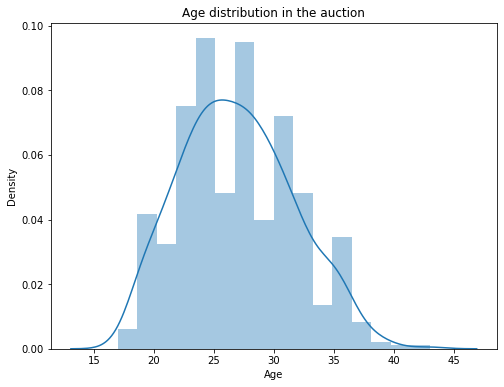

In [37]:
#sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(data['Age'])
plt.title('Age distribution in the auction')
plt.show()

### Sold player analysis

In [38]:
data.Bid.value_counts()

UnSold    385
Sold      204
Name: Bid, dtype: int64

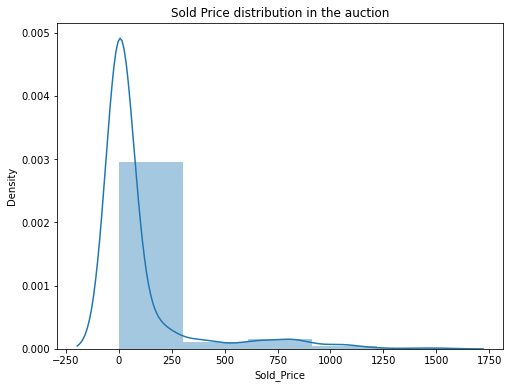

In [39]:
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(data['Sold_Price'], bins=5)
plt.title('Sold Price distribution in the auction')
plt.show()

In [40]:
min_sold_age = data[(data['Bid'] == 'Sold') & (data['Age'] == data['Age'].min())]
min_sold_age

,Set_No,Set_Name,Player,Country,State_Association,Age,Specialism,Batting,Bowling,IPL,Previous_IPLTeam(s),2021_Team,C/U/A,Base_Price,Sold_Price,New_Franchise,Bid
72,11,USP1,Noor Ahmad,Afghanistan,Foreign_Player,17,BOWLER,RHB,LEFT ARM Slow Unorthodox,0.0,Not Played,Not Played,Uncapped,30,30.0,Gujarat Titans,Sold


In [41]:
max_sold_age = data[data["Bid"]=="Sold"]["Age"].max()
max_sold_age

38

In [42]:
data[(data["Age"]==max_sold_age) & (data["Bid"]=="Sold")]

,Set_No,Set_Name,Player,Country,State_Association,Age,Specialism,Batting,Bowling,IPL,Previous_IPLTeam(s),2021_Team,C/U/A,Base_Price,Sold_Price,New_Franchise,Bid
16,3,AL1,Dwayne Bravo,West Indies,Foreign_Player,38,ALL-ROUNDER,RHB,RIGHT ARM Fast Medium,151.0,"MI, GL, CSK",CSK,Capped,200,440.0,Chennai Super Kings,Sold


In [43]:
print("Average age of players sold in auction is {}".format(int(data[data['Bid'] == 'Sold']['Age'].mean())))

print("Youngest Player sold is {} having age of {} years".format(data[(data['Bid'] == 'Sold') & (data['Age'] == data['Age'].min())]['Player'].to_string(index=False),
                                                                 data[(data['Bid'] == 'Sold') & (data['Age'] == data['Age'].min())]['Age'].to_string(index=False)))

print("Eldest Player sold is {} having age of {} years".format(data[(data['Age'] == max_sold_age) & (data['Bid'] == 'Sold')]['Player'].to_string(index=False),
                                                               data[(data['Age'] == max_sold_age) & (data['Bid'] == 'Sold')]['Age'].to_string(index=False)))

Average age of players sold in auction is 27
Youngest Player sold is Noor Ahmad having age of 17 years
Eldest Player sold is Dwayne Bravo having age of 38 years


In [44]:
f_players = data[data["Country"] != "India"]

In [45]:
print('Most expensive INDIAN player in the auction is {} at {} lakhs'.format(data[(data['Bid'] == 'Sold') & (data['Country'] == "India") & (data['Sold_Price'] == data['Sold_Price'].max())]['Player'].to_string(index=False),
                                                                             data[(data['Bid'] == 'Sold') & (data['Country'] == "India") & (data['Sold_Price'] == data['Sold_Price'].max())]['Sold_Price'].to_string(index=False)))
print('Most expensive OVERSEAS player in the auction is {} at {} lakhs'.format(f_players[(f_players['Bid'] == 'Sold') & (f_players['Sold_Price'] == f_players['Sold_Price'].max())]['Player'].to_string(index=False),
                                                                               f_players[(f_players['Bid'] == 'Sold') & (f_players['Sold_Price'] == f_players['Sold_Price'].max())]['Sold_Price'].to_string(index=False)))

Most expensive INDIAN player in the auction is Ishan Kishan at 1525.0 lakhs
Most expensive OVERSEAS player in the auction is Liam Livingstone at 1150.0 lakhs


In [46]:
data[(data['Country']=='India')&(data['Bid']=='Sold')][["Player",'Sold_Price']]

,Player,Sold_Price
2,Shikhar Dhawan,825.0
3,Shreyas Iyer,1225.0
5,Mohammad Shami,625.0
6,R. Ashwin,500.0
12,Devdutt Padikkal,775.0
...,...,...
228,N. Tilak Varma,170.0
269,B. Sai Sudharsan,20.0
270,Atharva Taide,20.0
500,Mohd. Arshad Khan,20.0


## Indian buys Price analysis

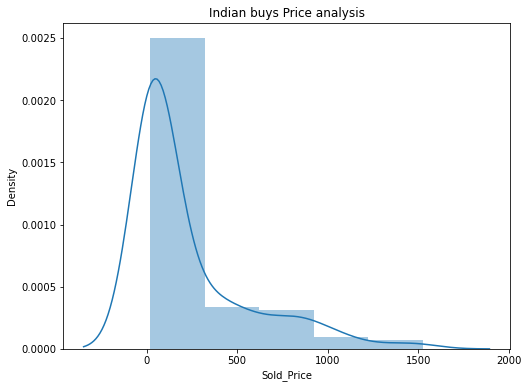

In [47]:
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(data[(data['Country']=='India')&(data['Bid']=='Sold')]['Sold_Price'], bins=5)
plt.title('Indian buys Price analysis')
plt.show()

## Overseas buys Price analysis

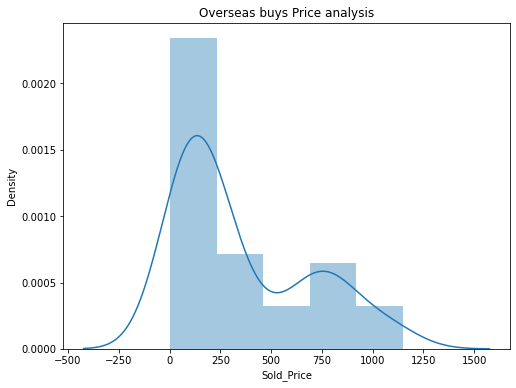

In [48]:
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(f_players[(f_players['Bid']=='Sold')]['Sold_Price'], bins=5)
plt.title('Overseas buys Price analysis')
plt.show()

In [49]:
data['Bid'].value_counts()

UnSold    385
Sold      204
Name: Bid, dtype: int64

## Players in auction

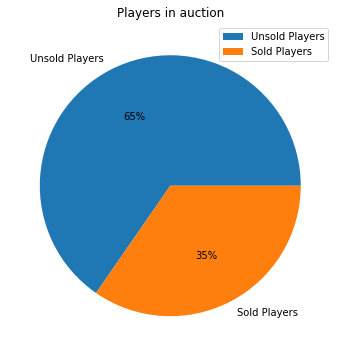

In [50]:
f, ax = plt.subplots(figsize=(8, 6))
labels = ['Unsold Players','Sold Players']
plt.pie(data['Bid'].value_counts(),labels=labels, autopct = '%0.0f%%')
plt.legend()
plt.title('Players in auction')
plt.show()

In [51]:
soldPlayers = data[data['Bid'] == 'Sold']

In [52]:
for i in range(len(soldPlayers['Country'])):
    if soldPlayers.iloc[i,3] != "India":
        soldPlayers.iloc[i,3] = 'Overseas'

In [53]:
soldPlayers['Country'].value_counts()

India       137
Overseas     67
Name: Country, dtype: int64

## Sold Players: Indian vs Overseas

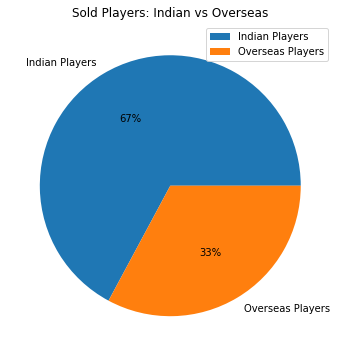

In [54]:
f, ax = plt.subplots(figsize=(8, 6))
labels = ['Indian Players','Overseas Players']
plt.pie(soldPlayers['Country'].value_counts(),labels=labels, autopct = '%0.0f%%')
plt.legend()
plt.title('Sold Players: Indian vs Overseas')
plt.show()

## Base Price vs Sold Price

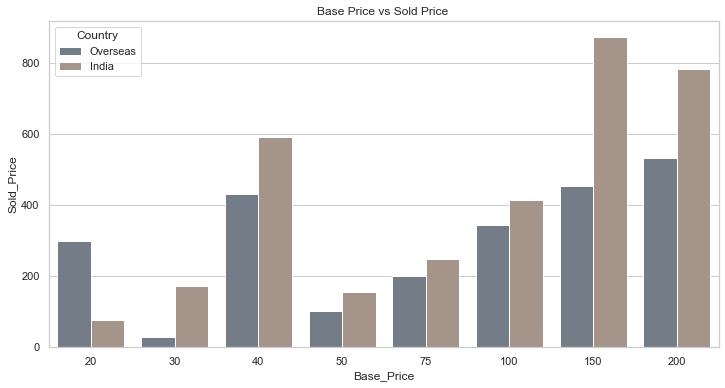

In [242]:
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(12, 6))
sns.barplot(soldPlayers['Base_Price'], soldPlayers['Sold_Price'],hue=soldPlayers['Country'],ci=None,saturation = 0.2)
plt.title('Base Price vs Sold Price ')
plt.show()

## Trends in Sold Price on the basis of Base Price

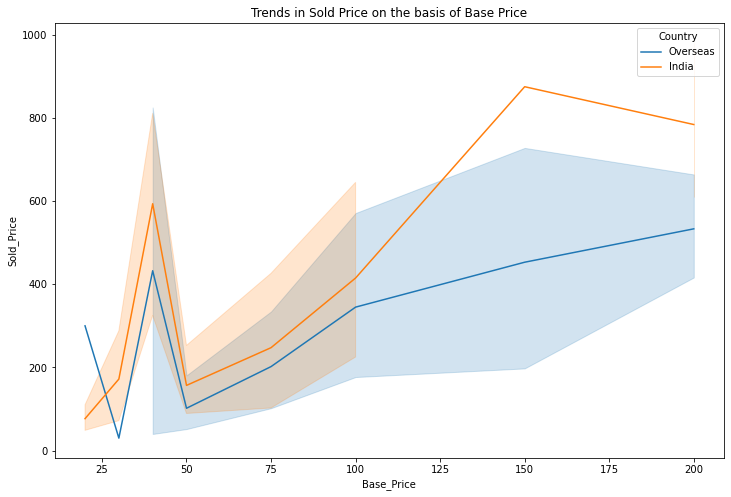

In [56]:
f, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x="Base_Price",y="Sold_Price",hue="Country",data=soldPlayers)
plt.title('Trends in Sold Price on the basis of Base Price')
plt.show()

In [57]:
stateAsso = soldPlayers['State_Association'].value_counts().to_frame().reset_index()

In [58]:
stateAsso.head(5)

,index,State_Association
0,Foreign_Player,67
1,KSCA,13
2,DDCA,13
3,TNCA,13
4,UPCA,12


In [59]:
stateAsso = stateAsso.rename(columns={'index':'State_Association','State_Association':'No. of Players'})

In [60]:
stateAsso.drop(0,axis=0, inplace=True)

In [61]:
stateAsso = stateAsso.rename(columns={'No_of_Sold Players':'State_Association','No. of Players':'No._of_Sold_Players'})

In [62]:
stateAsso.head()

,State_Association,No._of_Sold_Players
1,KSCA,13
2,DDCA,13
3,TNCA,13
4,UPCA,12
5,PCA,11


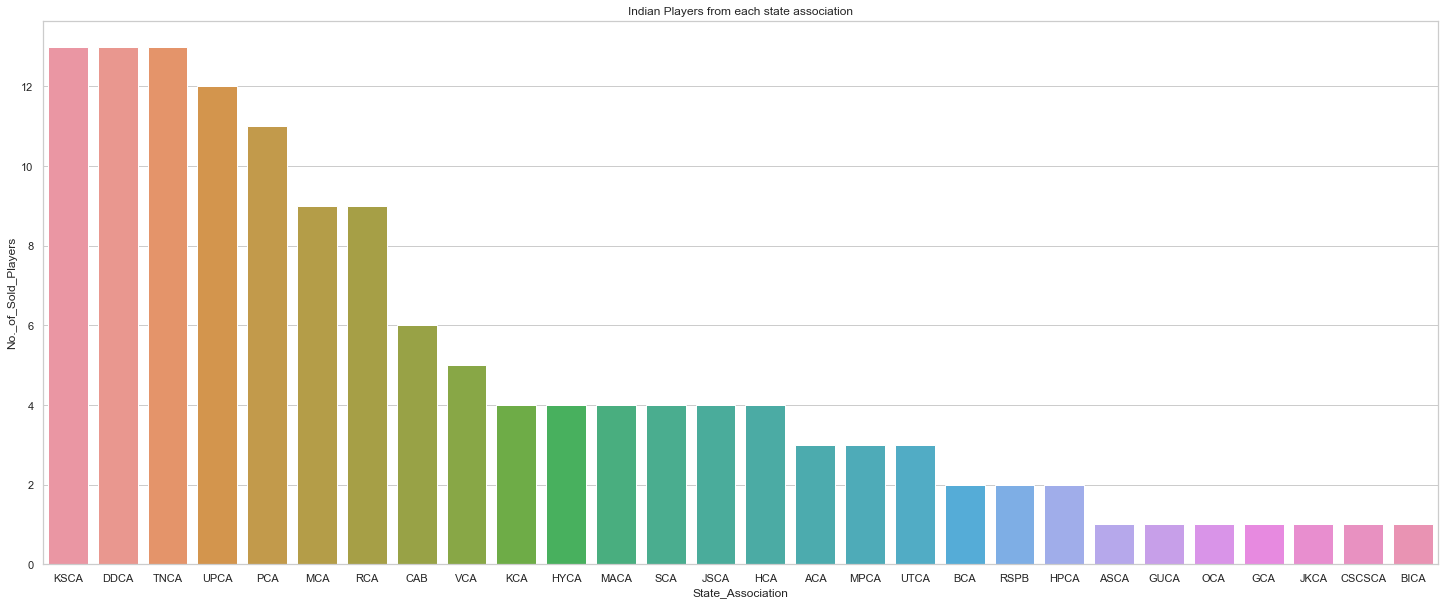

In [68]:
sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(25, 10))
sns.barplot(y="No._of_Sold_Players", x="State_Association", data=stateAsso)
plt.title('Indian Players from each state association')
plt.show()

## List of  State association having maximum and minimun players 

In [86]:
MaxPlayerStates = stateAsso[stateAsso['No._of_Sold_Players'] == stateAsso['No._of_Sold_Players'].max()]['State_Association'].to_string(index=False).split('\n')
MaxPlayerStates

['KSCA', 'DDCA', 'TNCA']

In [112]:
MinPlayerStates = stateAsso[stateAsso['No._of_Sold_Players'] == stateAsso['No._of_Sold_Players'].min()]['State_Association'].to_string(index=False).split('\n')
MinPlayerStates

['  ASCA', '  GUCA', '   OCA', '   GCA', '  JKCA', 'CSCSCA', '  BICA']

In [111]:
print('State Association with maximum Players are {},{},{} with count of {} Players'.format(MaxPlayerStates[0],
                                                                                            MaxPlayerStates[1],
                                                                                            MaxPlayerStates[2],
                                                                                            stateAsso['No._of_Sold_Players'].max()))
print('State Association with minimum Player are {},{},{},{},{},{},{} with count of {} Players'.format(MinPlayerStates[0].strip(),
                                                                                                       MinPlayerStates[1].strip(),
                                                                                                       MinPlayerStates[2].strip(),
                                                                                                       MinPlayerStates[3].strip(),
                                                                                                       MinPlayerStates[4].strip(),
                                                                                                       MinPlayerStates[5].strip(),
                                                                                                       MinPlayerStates[6].strip(),
                                                                                                       stateAsso['No._of_Sold_Players'].min()))

State Association with maximum Players are KSCA,DDCA,TNCA with count of 13 Players
State Association with minimum Player are ASCA,GUCA,OCA,GCA,JKCA,CSCSCA,BICA with count of 1 Players


In [117]:
data["C/U/A"].value_counts()

Uncapped     354
Capped       228
Associate      7
Name: C/U/A, dtype: int64

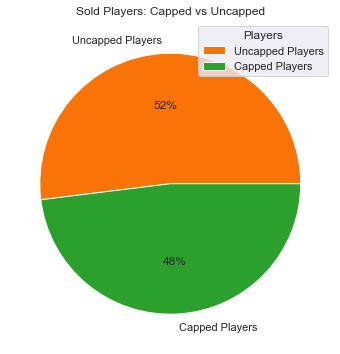

In [181]:
labels = ['Uncapped Players','Capped Players']
sns.set_theme(style="dark")
# Initialize the matplotlib figure
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(6,6))
plt.pie(soldPlayers['C/U/A'].value_counts(),labels=labels, autopct = '%0.0f%%',colors=['xkcd:orange','tab:green'])
plt.legend()
ax.legend(labels,loc=0,title ="Players")
plt.title('Sold Players: Capped vs Uncapped')
plt.show()

## Squad size of each team

In [141]:
Players_per_fran = soldPlayers['New_Franchise'].value_counts().to_frame().reset_index()

In [143]:
Players_per_fran.rename(columns={'index':'Team','New_Franchise':'Total_Players'},inplace=True)
Players_per_fran

,Team,Total_Players
0,Punjab Kings,23
1,Rajasthan Royals,21
2,Kolkata Knight Riders,21
3,Chennai Super Kings,21
4,Mumbai Indians,21
5,Gujarat Titans,20
6,Delhi Capitals,20
7,Sunrisers Hyderabad,20
8,Royal Challengers Bangalore,19
9,Lucknow Super Giants,18


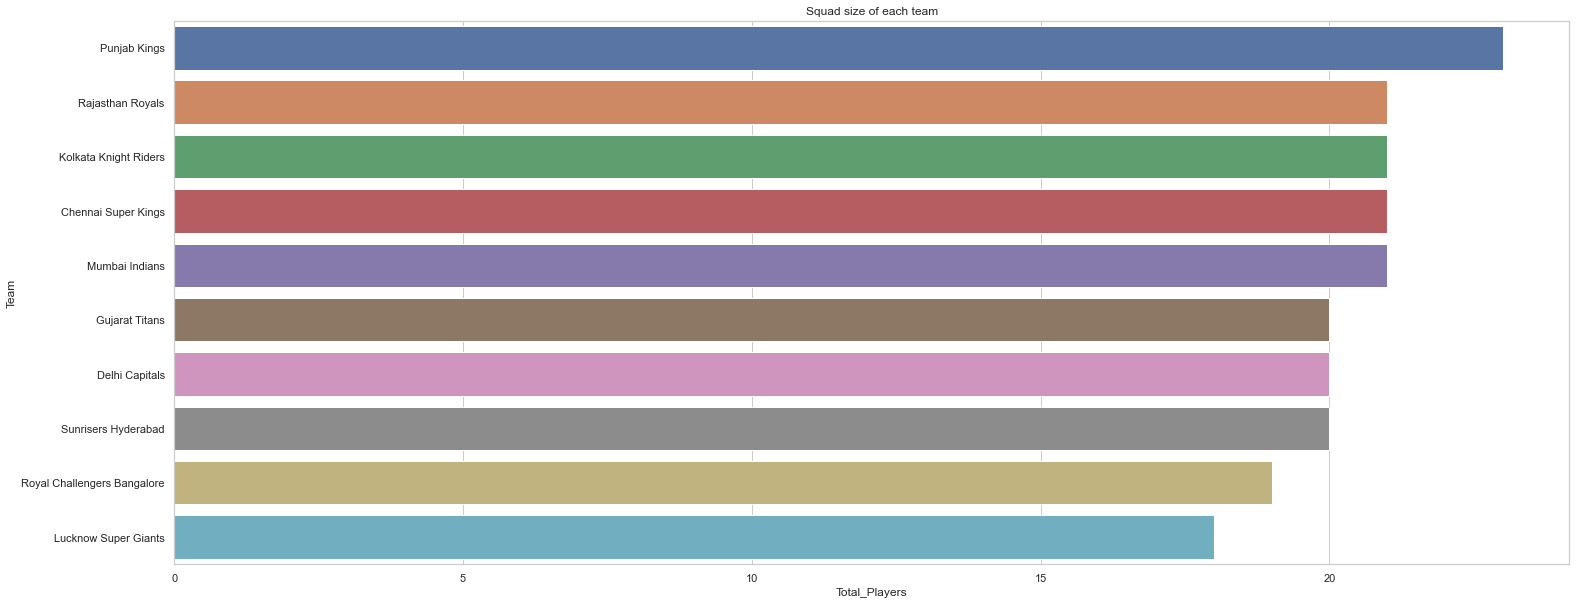

In [190]:
sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(25, 10))
sns.barplot(x="Total_Players", y="Team", data=Players_per_fran)
sns.set_style()
#plt.xticks(rotation = 90)
plt.title('Squad size of each team')
plt.show()

In [205]:
print('Squad size of Punjab Kings is maximum with {} players'.format(Players_per_fran[Players_per_fran['Team']=='Punjab Kings']['Total_Players'].to_string(index=False)))
print('Squad size of Lucknow Super Giants is minimum with {} players'.format(Players_per_fran[Players_per_fran['Team']=='Lucknow Super Giants']['Total_Players'].to_string(index=False)))

Squad size of Punjab Kings is maximum with 23 players
Squad size of Lucknow Super Giants is minimum with 18 players


## Players distribution by Specialism

In [217]:
speciality = soldPlayers["Specialism"].value_counts().reset_index().rename(columns ={"index":"Speciality","Specialism":"Total_Players"})

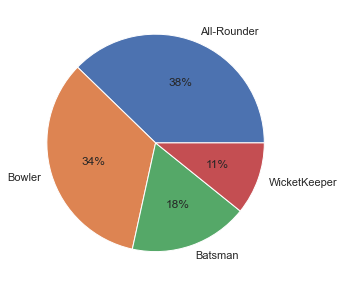

In [230]:
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(7, 5))
label = ['All-Rounder','Bowler','Batsman','WicketKeeper']
plt.pie(speciality['Total_Players'],labels=label,autopct = '%0.0f%%')
plt.show()

In [228]:
print('Most demanded players were {} ({} players)'.format(speciality[speciality['Total_Players'] == speciality['Total_Players'].max()]['Speciality'].to_string(index=False),
                                                          speciality['Total_Players'].max()))

print('less demanded players were {} ({} players)'.format(speciality[speciality['Total_Players'] == speciality['Total_Players'].min()]['Speciality'].to_string(index=False),
                                                          speciality['Total_Players'].min()))

Most demanded players were ALL-ROUNDER (77 players)
less demanded players were WICKETKEEPER (22 players)


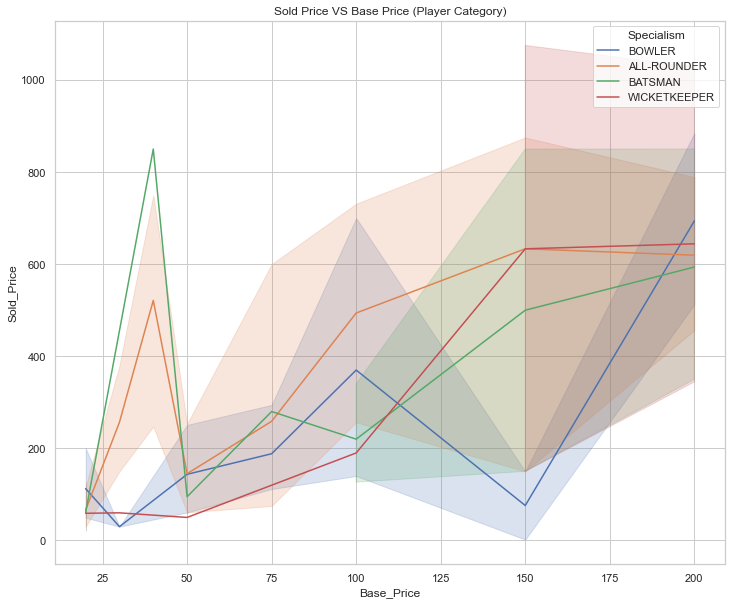

In [235]:
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(12,10))
sns.lineplot(x=soldPlayers["Base_Price"], y=soldPlayers["Sold_Price"],hue=soldPlayers["Specialism"])
plt.title('Sold Price VS Base Price (Player Category)')
plt.show()

## Team list

In [276]:
Rajasthan_Royals_team_list= soldPlayers.loc[soldPlayers["New_Franchise"]=="Rajasthan Royals"][["Player","Specialism","C/U/A","Sold_Price"]].reset_index(drop=True)
Punjab_Kings_team_list = soldPlayers.loc[soldPlayers["New_Franchise"]=="Punjab Kings"][["Player","Specialism","C/U/A","Sold_Price"]].reset_index(drop=True)
Kolkata_Knight_Riders_team_list = soldPlayers.loc[soldPlayers["New_Franchise"]=="Kolkata Knight Riders"][["Player","Specialism","C/U/A","Sold_Price"]].reset_index(drop=True)
Chennai_Super_Kings_team_list = soldPlayers.loc[soldPlayers["New_Franchise"]=="Chennai Super Kings"][["Player","Specialism","C/U/A","Sold_Price"]].reset_index(drop=True)
Mumbai_Indians_team_list  = soldPlayers.loc[soldPlayers["New_Franchise"]=="Mumbai Indians"][["Player","Specialism","C/U/A","Sold_Price"]].reset_index(drop=True)
Gujarat_Titans_team_list = soldPlayers.loc[soldPlayers["New_Franchise"]=="Gujarat_Titans"][["Player","Specialism","C/U/A","Sold_Price"]].reset_index(drop=True)
Delhi_Capitals_team_list = soldPlayers.loc[soldPlayers["New_Franchise"]=="Delhi Capitals"][["Player","Specialism","C/U/A","Sold_Price"]].reset_index(drop=True)
Sunrisers_Hyderabad_team_list = soldPlayers.loc[soldPlayers["New_Franchise"]=="Sunrisers Hyderabad"][["Player","Specialism","C/U/A","Sold_Price"]].reset_index(drop=True)
Royal_Challengers_Bangalore_team_list = soldPlayers.loc[soldPlayers["New_Franchise"]=="Royal Challengers Bangalore"][["Player","Specialism","C/U/A","Sold_Price"]].reset_index(drop=True)
Lucknow_Super_Giants_team_list = soldPlayers.loc[soldPlayers["New_Franchise"]=="Lucknow Super Giants"][["Player","Specialism","C/U/A","Sold_Price"]].reset_index(drop=True)

In [300]:
Rajasthan_Royals_team_list

,Player,Specialism,C/U/A,Sold_Price
0,Trent Boult,BOWLER,Capped,800.0
1,R. Ashwin,ALL-ROUNDER,Capped,500.0
2,Shimron Hetmyer,BATSMAN,Capped,850.0
3,Devdutt Padikkal,BATSMAN,Capped,775.0
4,Prasidh Krishna,BOWLER,Capped,1000.0
5,Yuzvendra Chahal,BOWLER,Capped,650.0
6,Riyan Parag,ALL-ROUNDER,Uncapped,380.0
7,James Neesham,ALL-ROUNDER,Capped,150.0
8,Nathan Coulter-Nile,BOWLER,Capped,200.0
9,Navdeep Saini,BOWLER,Capped,260.0


In [301]:
Punjab_Kings_team_list

,Player,Specialism,C/U/A,Sold_Price
0,Shikhar Dhawan,BATSMAN,Capped,825.0
1,Kagiso Rabada,BOWLER,Capped,925.0
2,Jonny Bairstow,WICKETKEEPER,Capped,675.0
3,Rahul Chahar,BOWLER,Capped,525.0
4,Harpreet Brar,ALL-ROUNDER,Uncapped,380.0
5,Shahrukh Khan,ALL-ROUNDER,Uncapped,900.0
6,Jitesh Sharma,WICKETKEEPER,Uncapped,20.0
7,Prabhsimran Singh,WICKETKEEPER,Uncapped,60.0
8,Ishan Porel,BOWLER,Uncapped,25.0
9,Liam Livingstone,ALL-ROUNDER,Capped,1150.0


In [302]:
Kolkata_Knight_Riders_team_list

,Player,Specialism,C/U/A,Sold_Price
0,Pat Cummins,ALL-ROUNDER,Capped,725.0
1,Shreyas Iyer,BATSMAN,Capped,1225.0
2,Nitish Rana,ALL-ROUNDER,Capped,800.0
3,Sam Billings,WICKETKEEPER,Capped,200.0
4,Umesh Yadav,BOWLER,Capped,200.0
5,Shivam Mavi,ALL-ROUNDER,Uncapped,725.0
6,Sheldon Jackson,WICKETKEEPER,Uncapped,60.0
7,Ajinkya Rahane,BATSMAN,Capped,100.0
8,Rinku Singh,BATSMAN,Uncapped,55.0
9,Anukul Roy,ALL-ROUNDER,Uncapped,20.0


In [303]:
Chennai_Super_Kings_team_list

,Player,Specialism,C/U/A,Sold_Price
0,Robin Uthappa,BATSMAN,Capped,200.0
1,Dwayne Bravo,ALL-ROUNDER,Capped,440.0
2,Ambati Rayudu,WICKETKEEPER,Capped,675.0
3,Deepak Chahar,BOWLER,Capped,1400.0
4,Tushar Deshpande,BOWLER,Uncapped,20.0
5,Shivam Dube,ALL-ROUNDER,Capped,400.0
6,Chris Jordan,ALL-ROUNDER,Capped,360.0
7,Maheesh Theekshana,BOWLER,Capped,70.0
8,Rajvardhan Hangargekar,ALL-ROUNDER,Uncapped,150.0
9,Simarjeet Singh,BOWLER,Uncapped,20.0


In [304]:
Mumbai_Indians_team_list

,Player,Specialism,C/U/A,Sold_Price
0,Ishan Kishan,WICKETKEEPER,Capped,1525.0
1,Dewald Brevis,BATSMAN,Uncapped,300.0
2,Anmolpreet Singh,BATSMAN,Uncapped,20.0
3,Basil Thampi,BOWLER,Uncapped,30.0
4,Murugan Ashwin,BOWLER,Uncapped,160.0
5,Jaydev Unadkat,BOWLER,Capped,130.0
6,Mayank Markande,BOWLER,Capped,65.0
7,Sanjay Yadav,ALL-ROUNDER,Uncapped,50.0
8,Jofra Archer,ALL-ROUNDER,Capped,800.0
9,Daniel Sams,ALL-ROUNDER,Capped,260.0


In [305]:
Gujarat_Titans_team_list

,Player,Specialism,C/U/A,Sold_Price


In [306]:
Delhi_Capitals_team_list

,Player,Specialism,C/U/A,Sold_Price
0,David Warner,BATSMAN,Capped,625.0
1,Mitchell Marsh,ALL-ROUNDER,Capped,650.0
2,Mustafizur Rahman,BOWLER,Capped,200.0
3,Shardul Thakur,BOWLER,Capped,1075.0
4,Kuldeep Yadav,BOWLER,Capped,200.0
5,Ashwin Hebbar,BATSMAN,Uncapped,20.0
6,Sarfaraz Khan,ALL-ROUNDER,Uncapped,20.0
7,Kamlesh Nagarkoti,ALL-ROUNDER,Uncapped,110.0
8,Mandeep Singh,BATSMAN,Capped,110.0
9,Chetan Sakariya,BOWLER,Capped,420.0


In [307]:
Sunrisers_Hyderabad_team_list

,Player,Specialism,C/U/A,Sold_Price
0,Washington Sundar,ALL-ROUNDER,Capped,875.0
1,Nicholas Pooran,WICKETKEEPER,Capped,1075.0
2,T. Natarajan,BOWLER,Capped,400.0
3,Bhuvneshwar Kumar,BOWLER,Capped,420.0
4,Priyam Garg,BATSMAN,Uncapped,20.0
5,Rahul Tripathi,BATSMAN,Uncapped,850.0
6,Abhishek Sharma,ALL-ROUNDER,Uncapped,650.0
7,Vishnu Vinod,WICKETKEEPER,Uncapped,50.0
8,Kartik Tyagi,BOWLER,Uncapped,400.0
9,Shreyas Gopal,BOWLER,Uncapped,75.0


In [308]:
Royal_Challengers_Bangalore_team_list

,Player,Specialism,C/U/A,Sold_Price
0,Faf Du Plessis,BATSMAN,Capped,700.0
1,Wanindu Hasaranga,ALL-ROUNDER,Capped,1075.0
2,Harshal Patel,ALL-ROUNDER,Capped,1075.0
3,Dinesh Karthik,WICKETKEEPER,Capped,550.0
4,Josh Hazlewood,BOWLER,Capped,775.0
5,Shahbaz Ahamad,ALL-ROUNDER,Uncapped,240.0
6,Anuj Rawat,WICKETKEEPER,Uncapped,340.0
7,Akash Deep,BOWLER,Uncapped,20.0
8,Karn Sharma,BOWLER,Capped,50.0
9,Mahipal Lomror,ALL-ROUNDER,Uncapped,95.0


In [309]:
Lucknow_Super_Giants_team_list

,Player,Specialism,C/U/A,Sold_Price
0,Quinton De Kock,WICKETKEEPER,Capped,675.0
1,Manish Pandey,BATSMAN,Capped,460.0
2,Jason Holder,ALL-ROUNDER,Capped,875.0
3,Krunal Pandya,ALL-ROUNDER,Capped,825.0
4,Mark Wood,BOWLER,Capped,750.0
5,Deepak Hooda,ALL-ROUNDER,Uncapped,575.0
6,Avesh Khan,BOWLER,Uncapped,1000.0
7,K. Gowtham,ALL-ROUNDER,Capped,90.0
8,Dushmanta Chameera,BOWLER,Capped,200.0
9,Shahbaz Nadeem,BOWLER,Capped,50.0
